In [1]:
import numpy as np

In [2]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
def sigmoid_grad(z):
  t = sigmoid(z)
  return t * (1 - t)

In [3]:
Activations = {
    'sigmoid': sigmoid
}
Activations_grad = {
    'sigmoid': sigmoid_grad
}

In [4]:
class Layer():
  def __init__(self, n_neurons, activation):
    self.n_neurons = n_neurons
    self.w = None
    self.activation = Activations[activation]
    self.activation_grad = Activations_grad[activation]
  def initialize(self, prev):
    self.w = np.random.normal(size=(prev, self.n_neurons))
  def compute(self, Oi):
    Netj = np.dot(Oi, self.w)
    Oj = self.activation(Netj)
    return Netj, Oj
  def grad(self, Dk, w_next, Oi):
    partial = np.dot(Dk, w_next.T)
    Netj = self.compute(Oi)[0]
    delta = np.multiply(partial, self.activation_grad(Netj))
    Dw = np.dot(Oi.T, delta)
    return Dw, delta
  def update(self, learning_rate, Dw):
    self.w = self.w - learning_rate * Dw

In [5]:
class OutputLayer(Layer):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
  def grad(self, target, Oi):
    Netj, Oj = self.compute(Oi)
    delta = np.multiply(target - Oj, self.activation_grad(Netj))
    Dw = np.dot(Oi.T, delta)
    return Dw, delta

In [6]:
class NeuralNetwork():
  def __init__(self, layers, input_shape):
    self.layers = layers
    self.O_ALL = None
    self.input_shape = input_shape
    self.layers[0].initialize(self.input_shape)
    for i in range(1, len(self.layers)):
      self.layers[i].initialize(self.layers[i-1].n_neurons)
  def predict(self, X):
    Oi = X
    self.O_ALL = []
    self.O_ALL.append(Oi)
    for layer in self.layers:
      Oi = layer.compute(Oi)[1]
      self.O_ALL.append(Oi)
    return Oi
  def loss(self, Oj, y):
    E = 0.5 * (np.sum(y - Oj) ** 2)
    return E
  #def updates(self):
  #def compute_grades(self):
  def train(self, X_train, y_train, learning_rate, num_iterations):
    history = []
    for i in range(num_iterations):
      Oj = self.predict(X_train)
      E = self.loss(Oj, y_train)
      history.append((i ,E))
      print(f'iteration: {i}    Loss = {E}')
      for j in reversed(range(len(self.layers))):
        if j == len(self.layers) - 1:
          Dw, delta = self.layers[j].grad(y_train, self.O_ALL[j])
        else:
          Dw, delta = self.layers[j].grad(delta, self.layers[j+1].w, self.O_ALL[j])
        self.layers[j].update(learning_rate, Dw)


In [7]:
X1 = np.linspace(-1, 1, 100)
X2 = (3 * X1 + 5) + np.random.normal(size=(100))
X = np.c_[X1, X2]
y = (X1 >= 0)

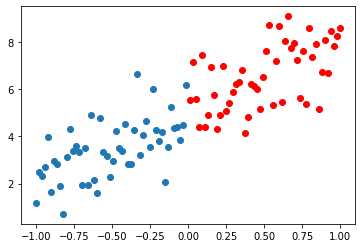

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X1[X1>=0], X2[X1>=0], color = 'red')
plt.scatter(X1[X1<0], X2[X1<0])
plt.show()

In [9]:
layers = [
    Layer(10, 'sigmoid'), 
    Layer(50, 'sigmoid'), 
    Layer(135, 'sigmoid'),
    OutputLayer(2, 'sigmoid')
]

In [10]:
nn = NeuralNetwork(layers, 2) #2 is number of featuers

In [11]:
X.shape

(100, 2)

In [12]:
hold = nn.predict(X)

In [13]:
print(hold.shape)

(100, 2)


In [14]:
a = np.where(y, 1, 0)
b = np.where(y, 0, 1)
y_ = np.c_[a, b]

In [15]:
nn.train(X, y_, 1e-3, 100)

iteration: 0    Loss = 0.4379867795622971
iteration: 1    Loss = 0.37805826956800315
iteration: 2    Loss = 0.32862228318599807
iteration: 3    Loss = 0.2874479642820455
iteration: 4    Loss = 0.25285763628106706
iteration: 5    Loss = 0.2235715165782612
iteration: 6    Loss = 0.19860070586556716
iteration: 7    Loss = 0.1771721043484486
iteration: 8    Loss = 0.15867486143286308
iteration: 9    Loss = 0.14262161034563337
iteration: 10    Loss = 0.1286200208198428
iteration: 11    Loss = 0.11635166081327723
iteration: 12    Loss = 0.10555610731737966
iteration: 13    Loss = 0.09601887493932364
iteration: 14    Loss = 0.08756215398087196
iteration: 15    Loss = 0.08003763864874172
iteration: 16    Loss = 0.07332092605173894
iteration: 17    Loss = 0.06730710689093095
iteration: 18    Loss = 0.06190726826197333
iteration: 19    Loss = 0.057045700383950945
iteration: 20    Loss = 0.05265765082537221
iteration: 21    Loss = 0.04868750768524054
iteration: 22    Loss = 0.045087321176801885
i

In [16]:
#ADD Relu, leaky Relu, Softmax
#load momentum from my own notebook
#tune the hyperparamter(learning_rate, #layers, #neurons/layer) till acheive a good results
#write the report